In [1]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 11.6 MB/s eta 0:00:00


In [2]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hasmita23d0385","key":"59045a4b748ed2bf18fae393a8b307e6"}'}

In [3]:
# Make a directory to store the Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json

# Verify the Kaggle API is set up properly
!kaggle datasets list

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned      Students Performance | Clean Dataset             10KB  2024-10-29 19:32:26           9947        182  1.0              
ikynahidwin/depression-professional-dataset                   Depression Professional Dataset                  16KB  2024-11-20 06:39:18           1193         26  1.0              
steve1215rogg/student-lifestyle-dataset                       student lifestyle dataset                        22KB  2024-11-11 19:11:28           4722         69  1.0              
ikynahidwin/depression-student-dataset                        Depression Student Dataset  

In [4]:
# Download the Caltech-256 dataset
!kaggle datasets download -d hasmitakurre/nasa-soil-moisture-india-dataset

Dataset URL: https://www.kaggle.com/datasets/hasmitakurre/nasa-soil-moisture-india-dataset
License(s): unknown
 95% 205M/216M [00:01<00:00, 208MB/s]
100% 216M/216M [00:01<00:00, 189MB/s]


In [5]:
# Unzip the downloaded dataset
!unzip nasa-soil-moisture-india-dataset.zip -d /content/nasa-soil-moisture-india-dataset

Archive:  nasa-soil-moisture-india-dataset.zip
   creating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/
  inflating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/soil_moisture_india_and_sri_lanka_2015-04-02.tif  
  inflating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/soil_moisture_india_and_sri_lanka_2015-04-05.tif  
  inflating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/soil_moisture_india_and_sri_lanka_2015-04-08.tif  
  inflating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/soil_moisture_india_and_sri_lanka_2015-04-11.tif  
  inflating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/soil_moisture_india_and_sri_lanka_2015-04-14.tif  
  inflating: /content/nasa-soil-moisture-india-dataset/nasa-soil-moisture-india-dataset/soil_moisture_india_and_sri_lanka_2015-04-17.tif  
  inflating: /content/nasa-soi

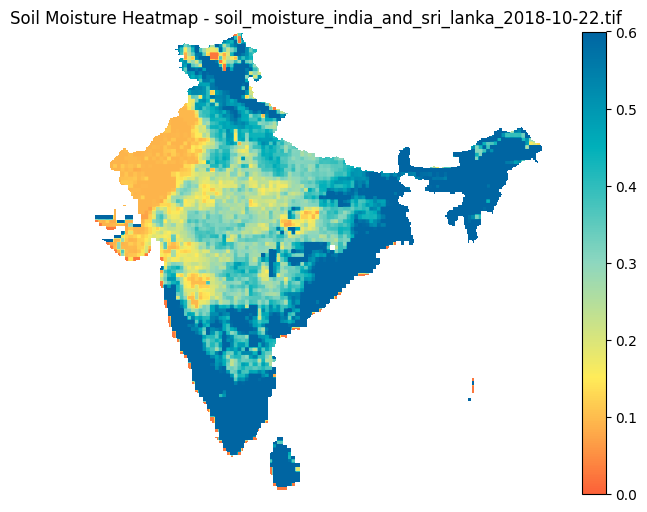

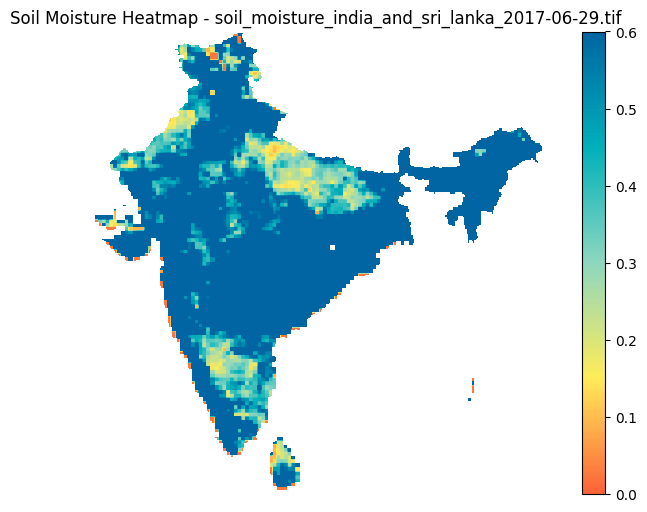

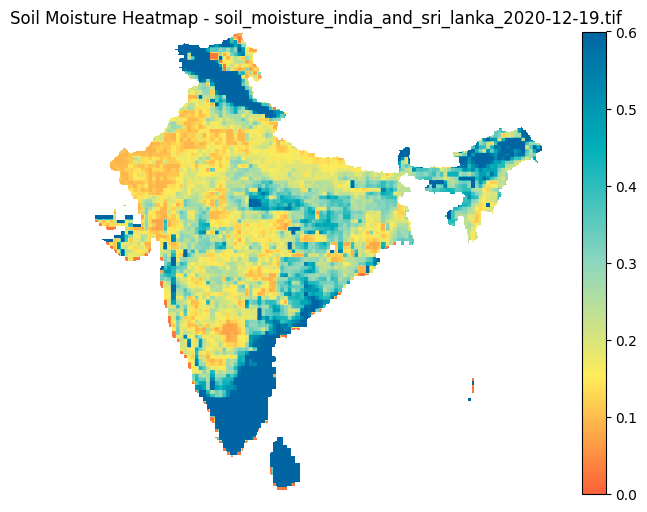

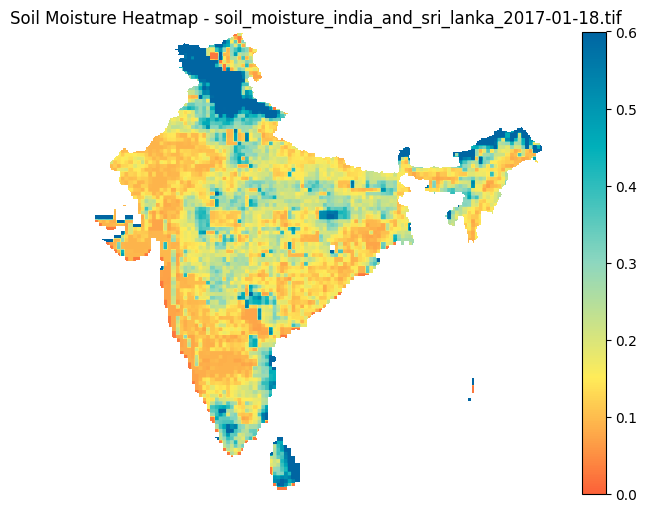

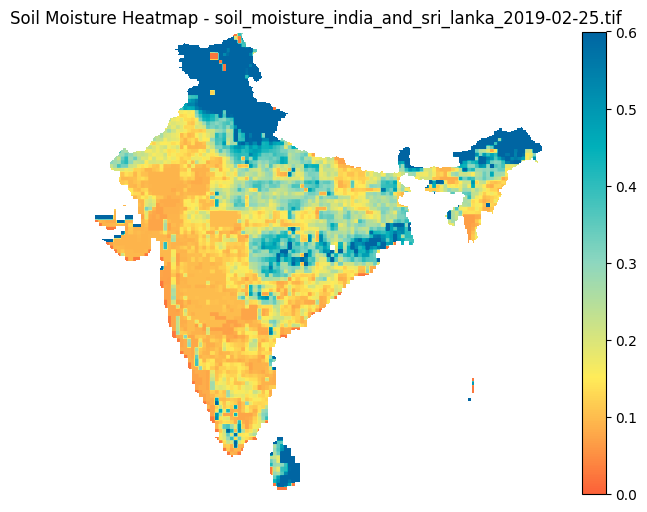

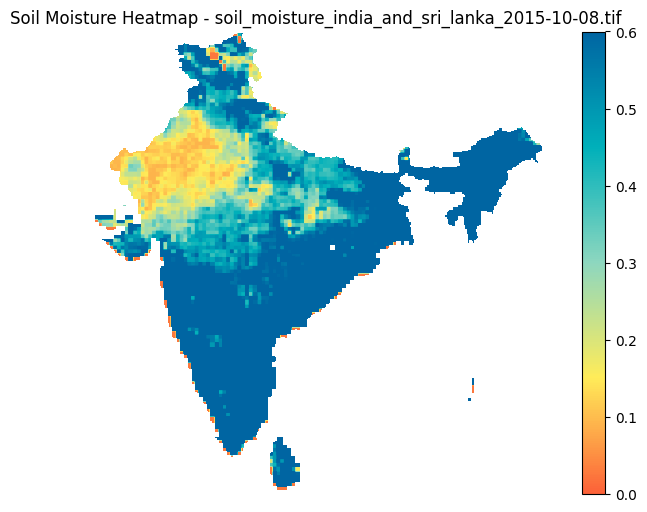

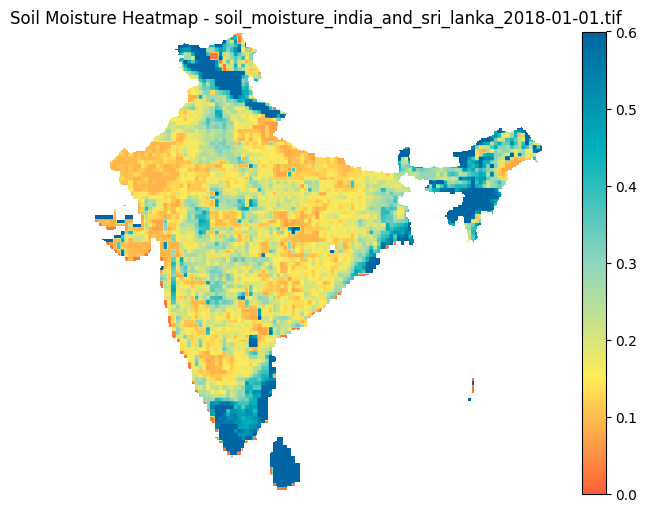

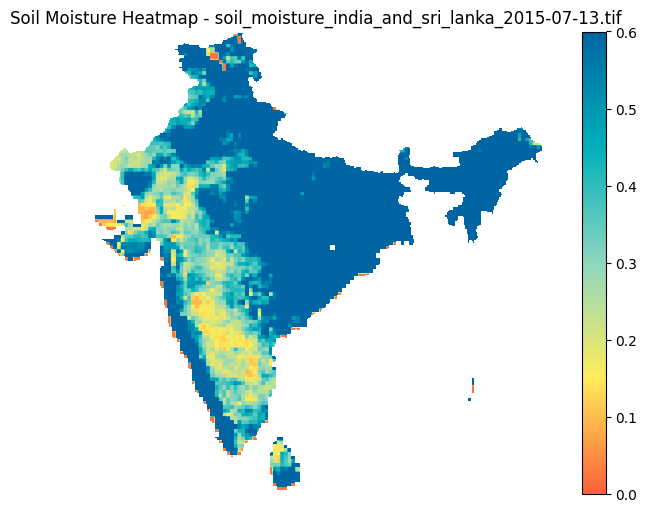

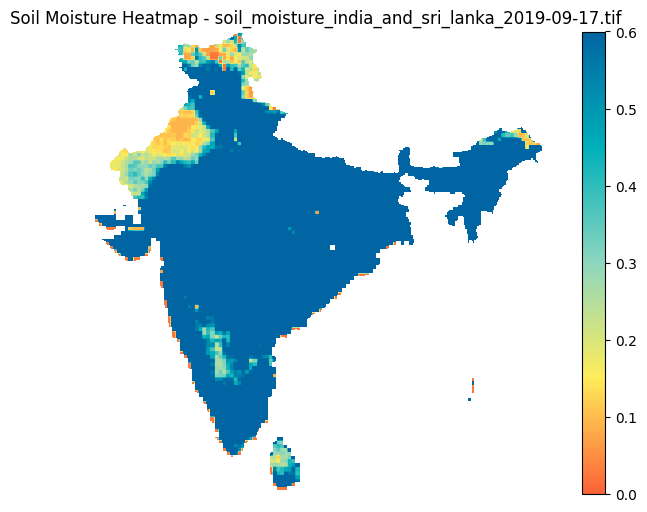

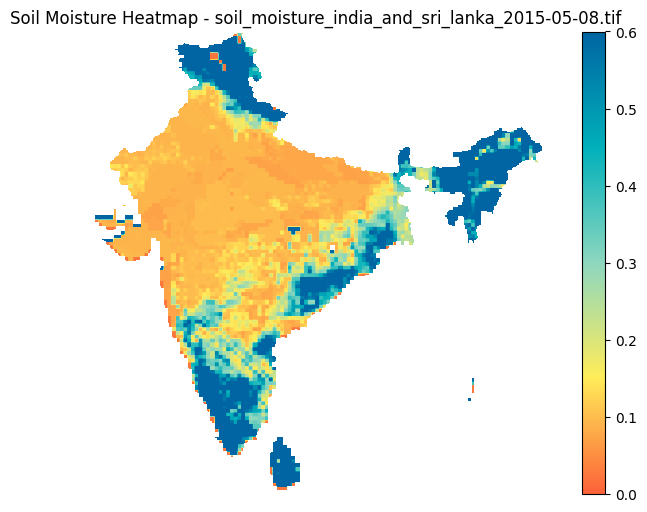

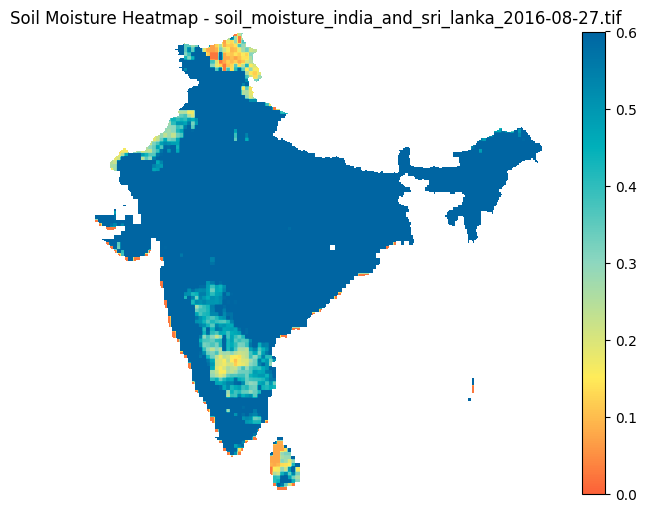

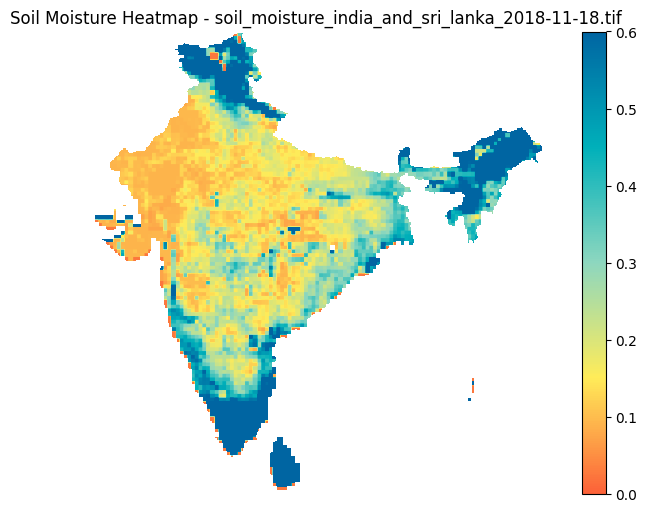

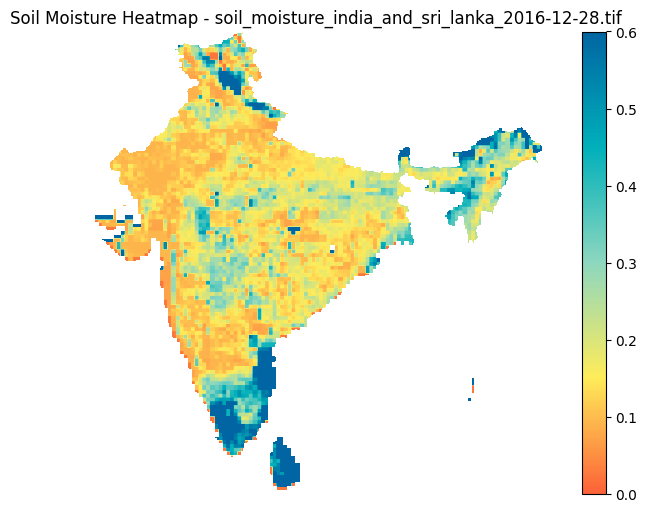

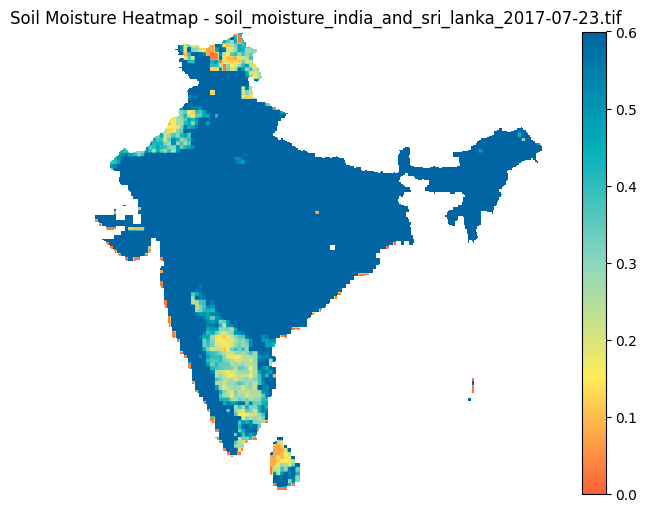

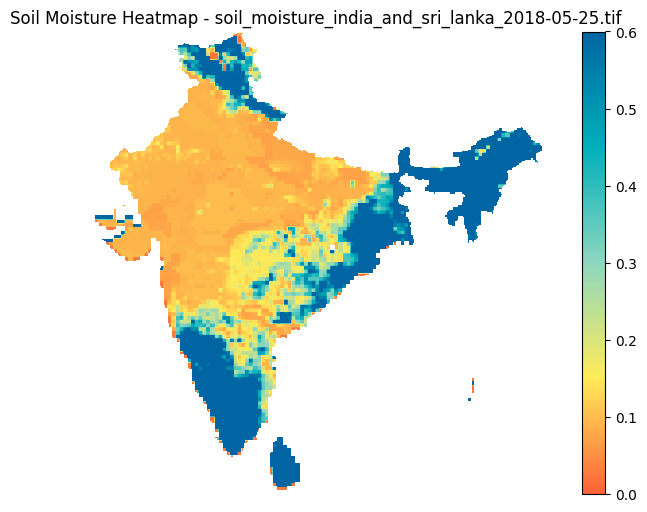

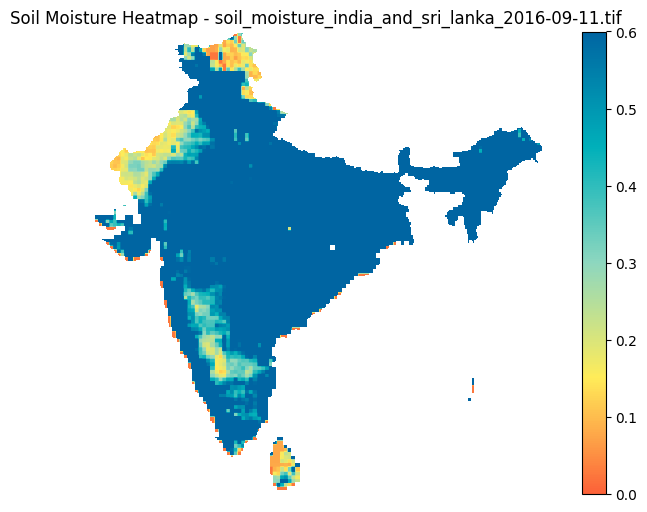

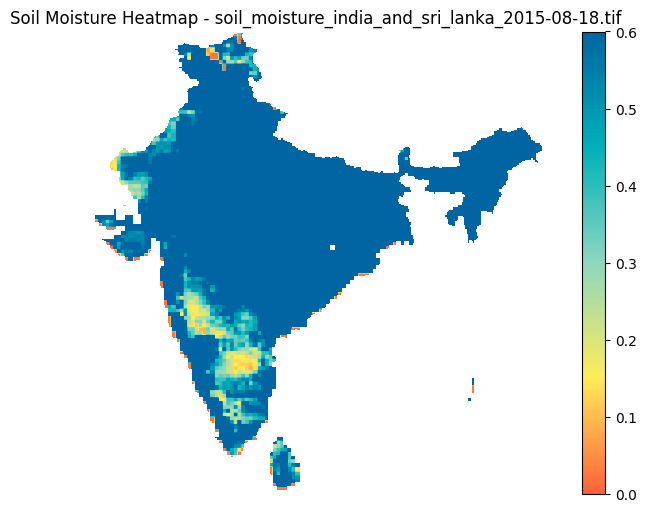

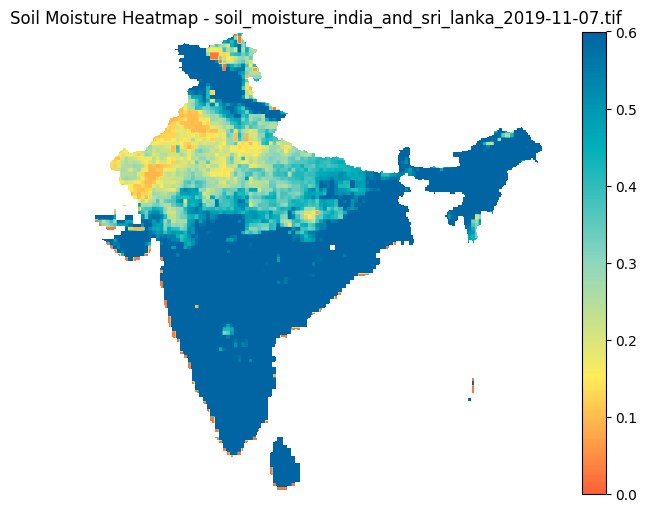

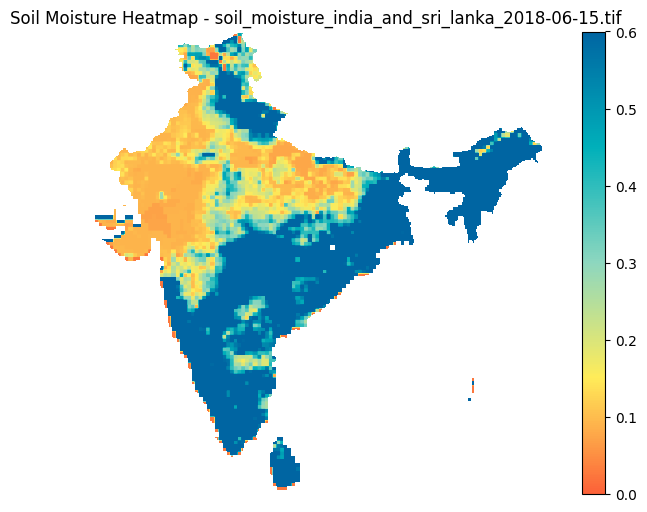

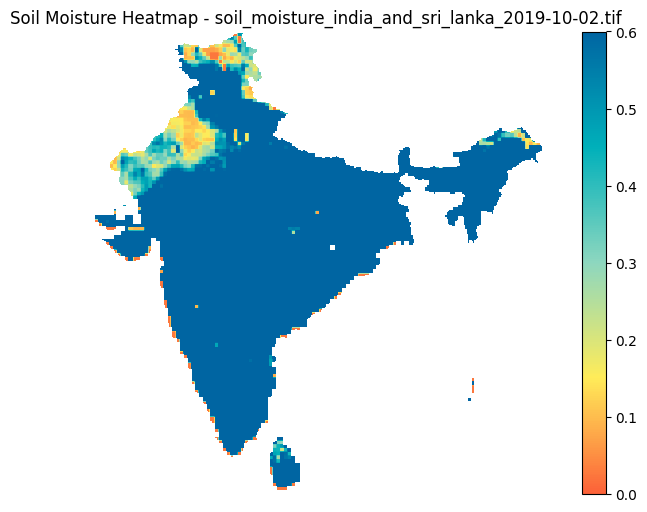

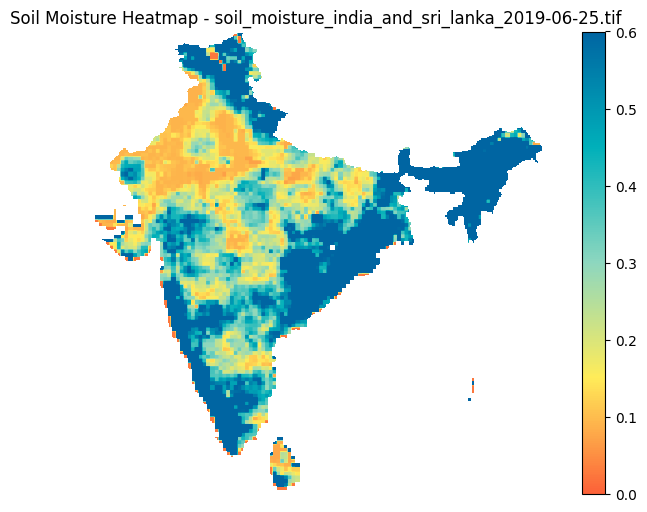

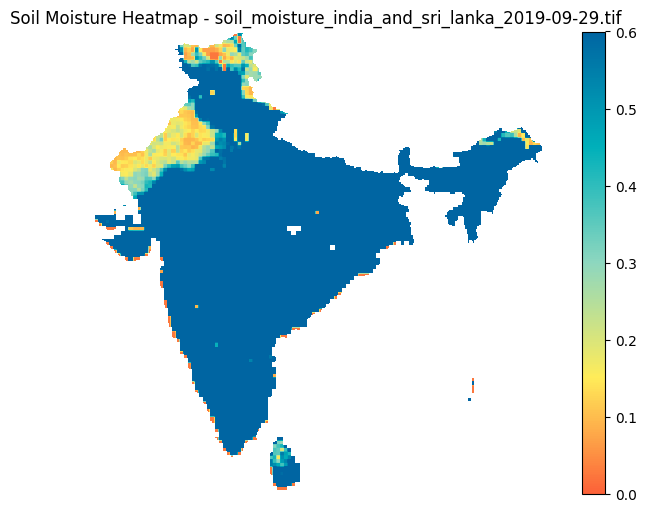

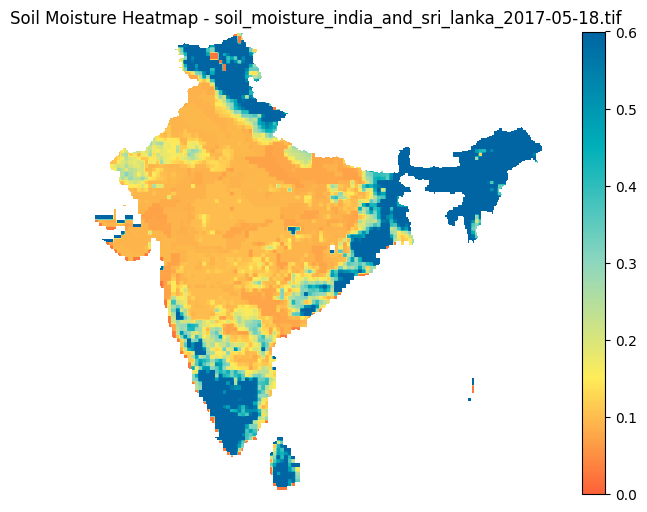

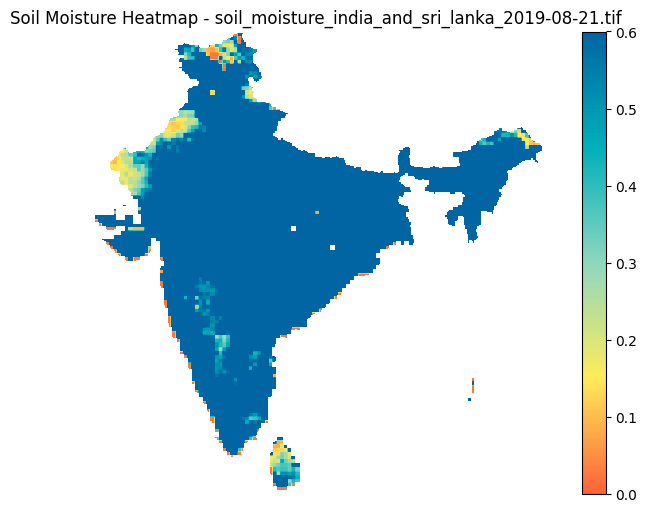

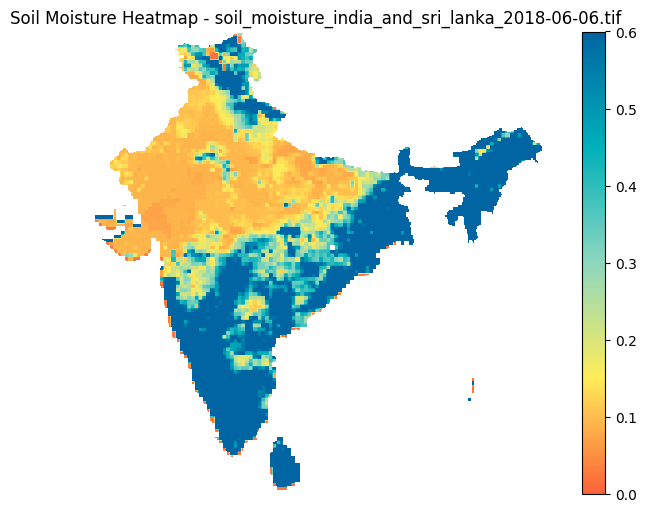

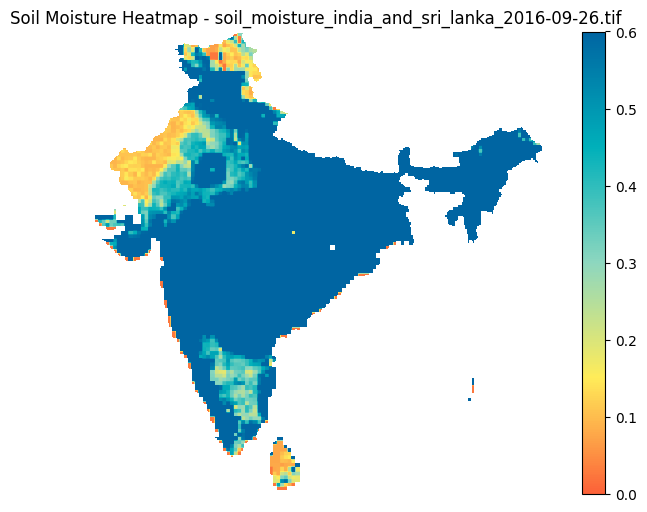

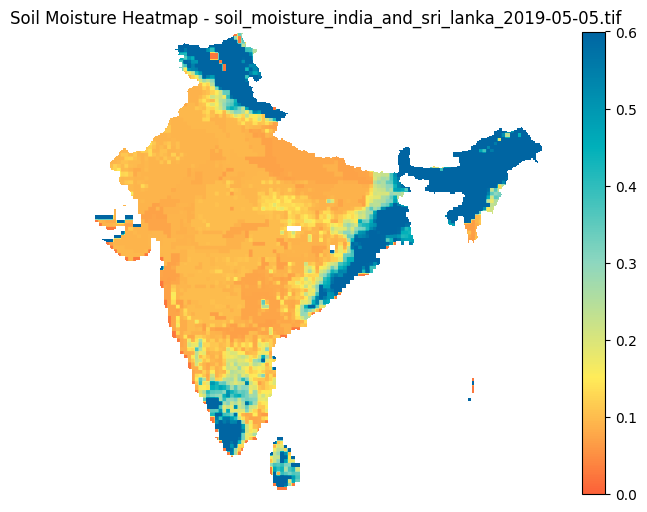

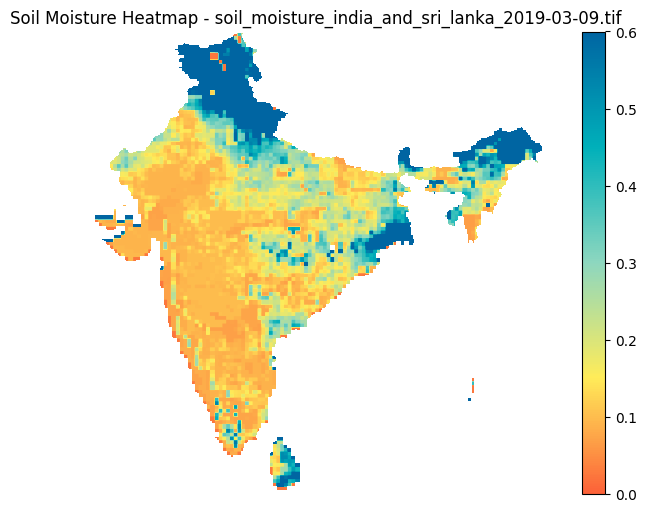

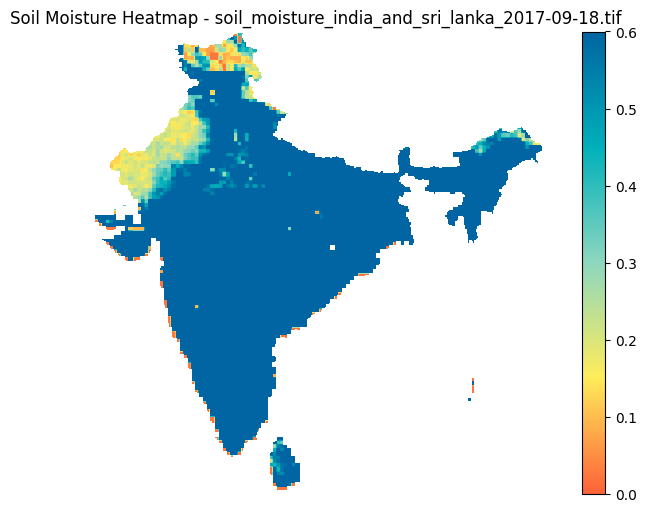

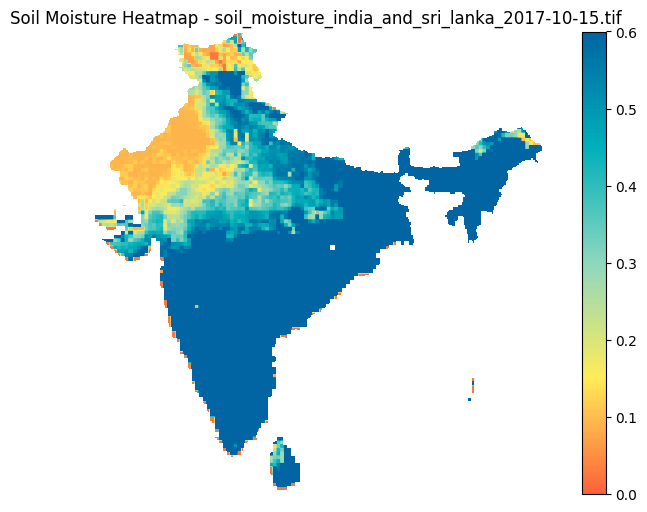

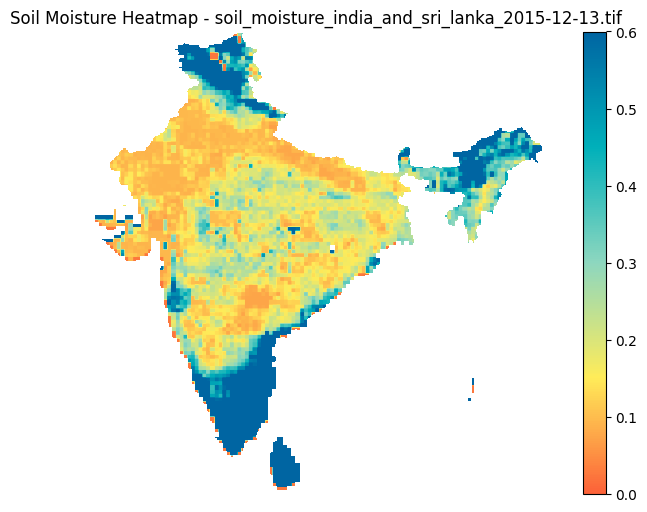

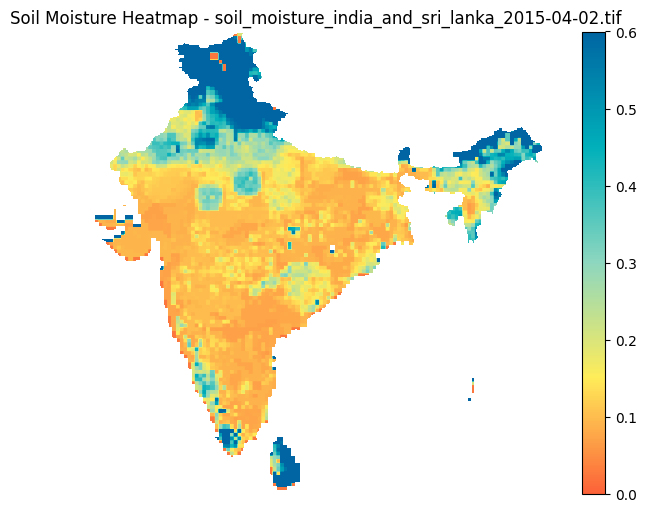

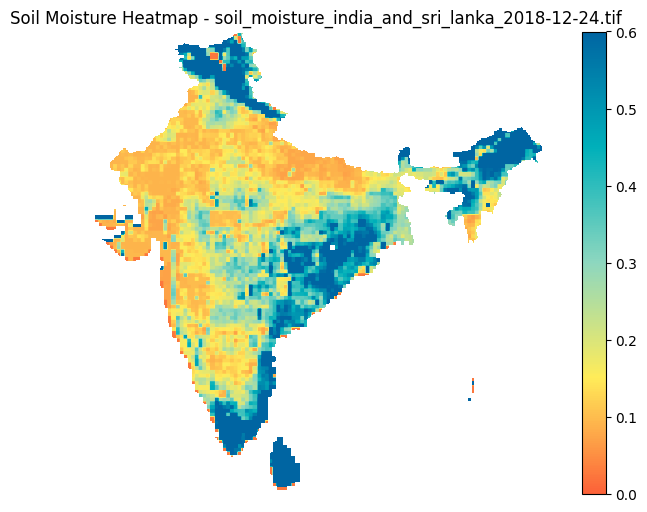

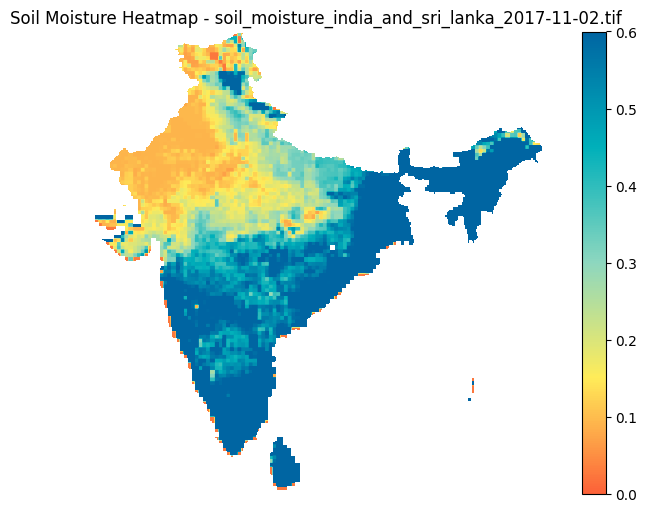

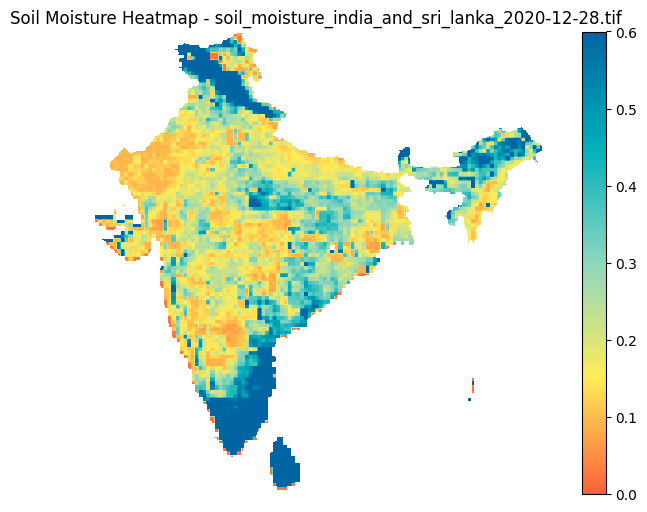

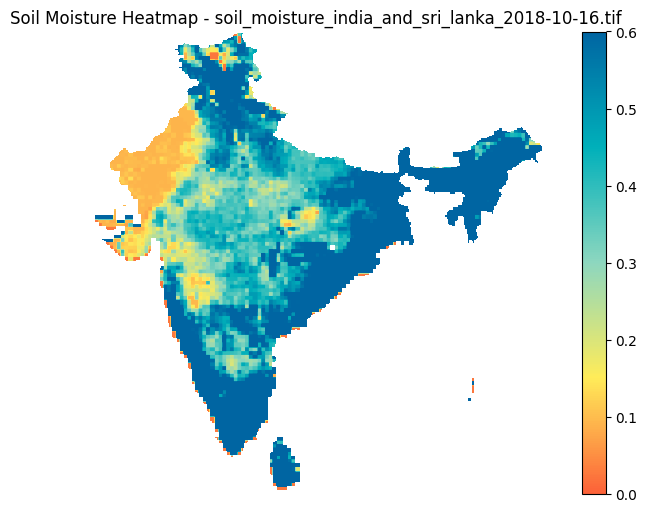

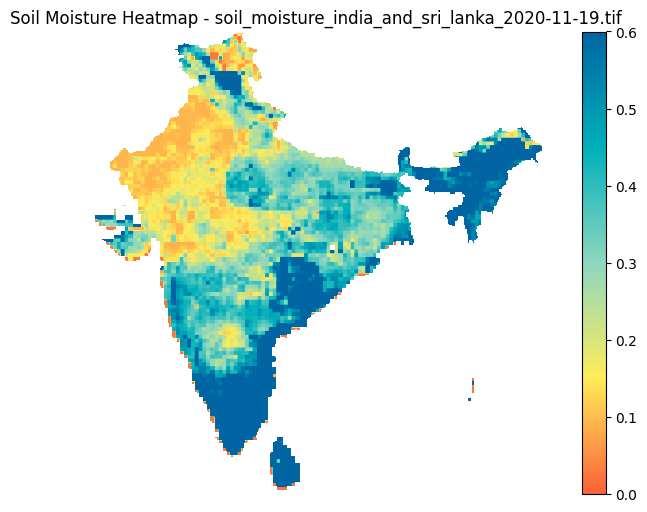

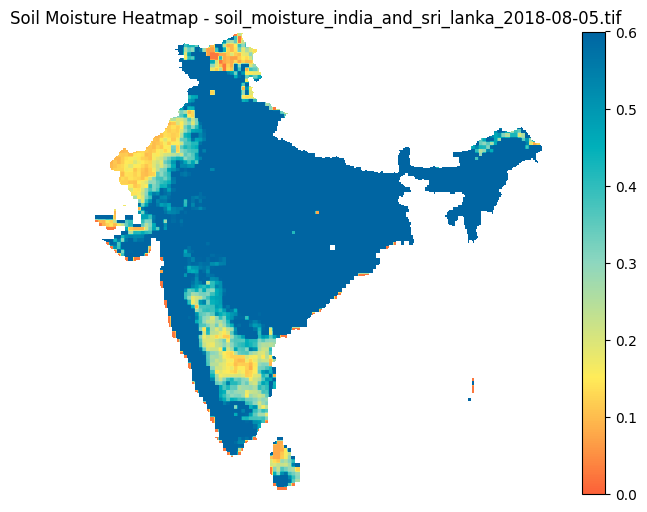

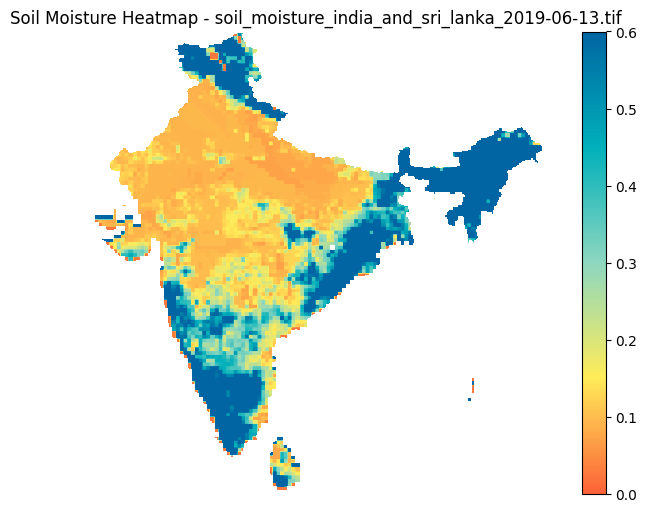

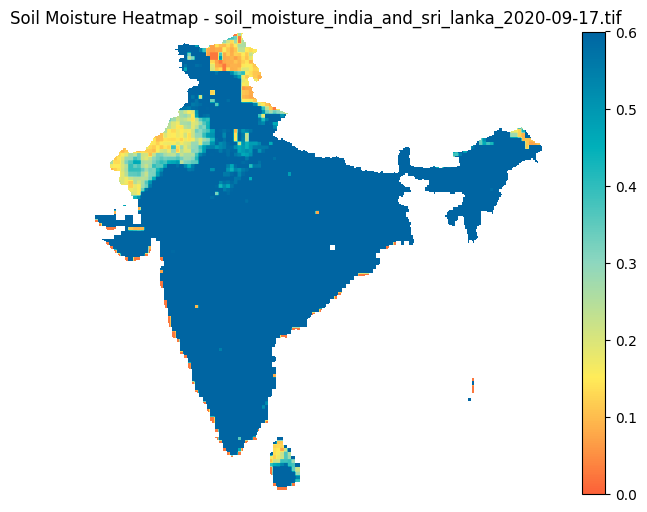

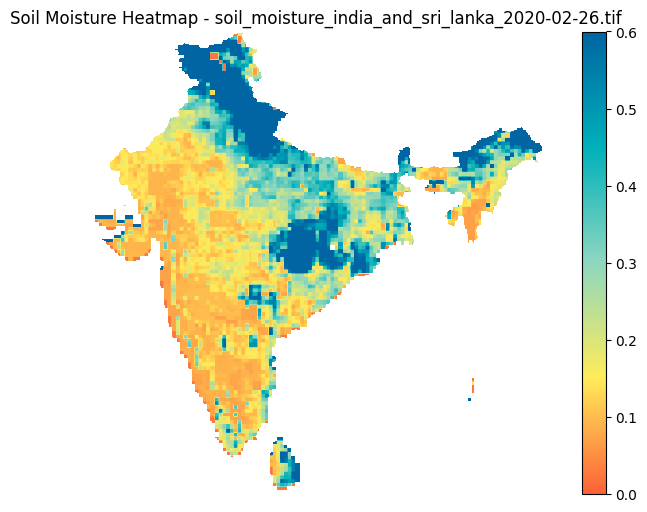

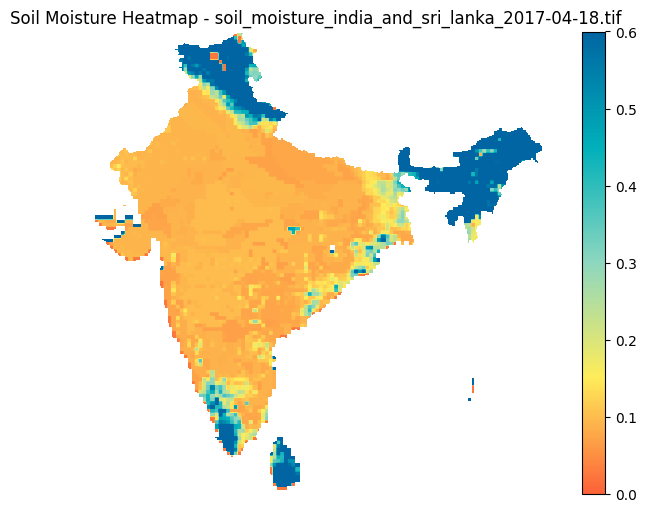

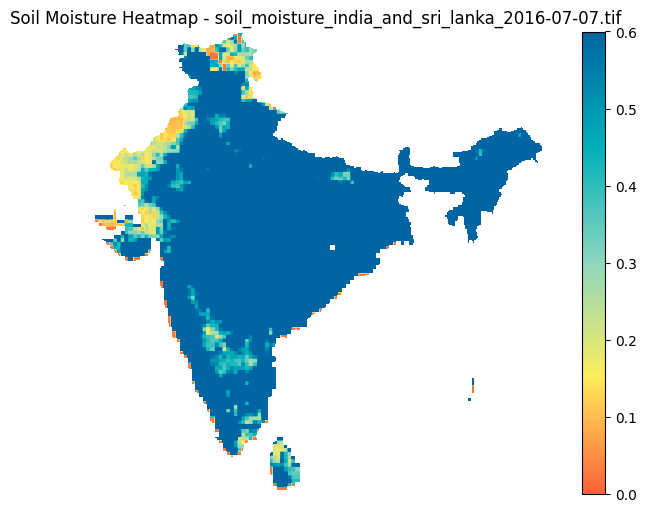

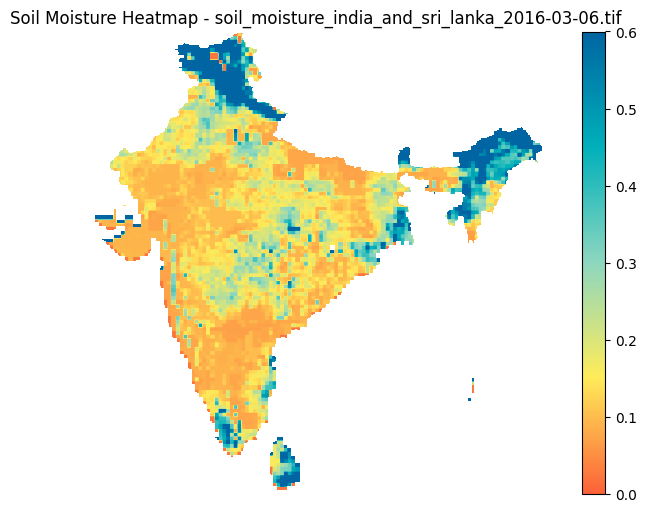

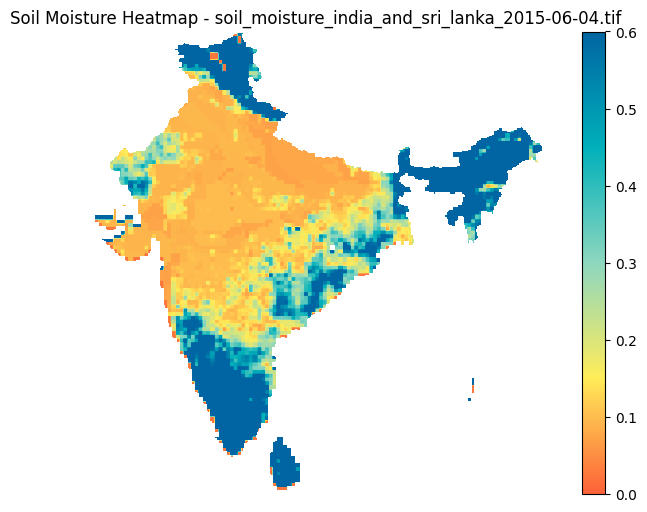

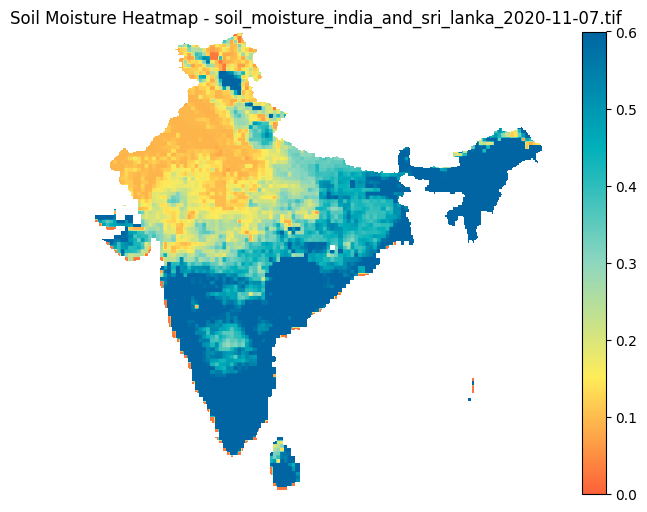

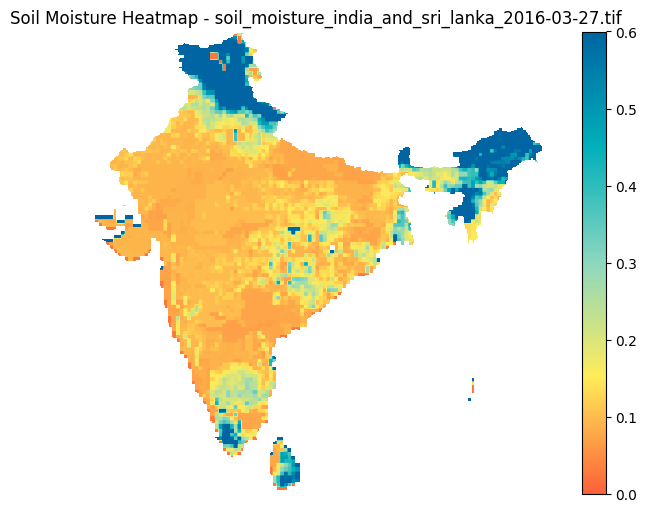

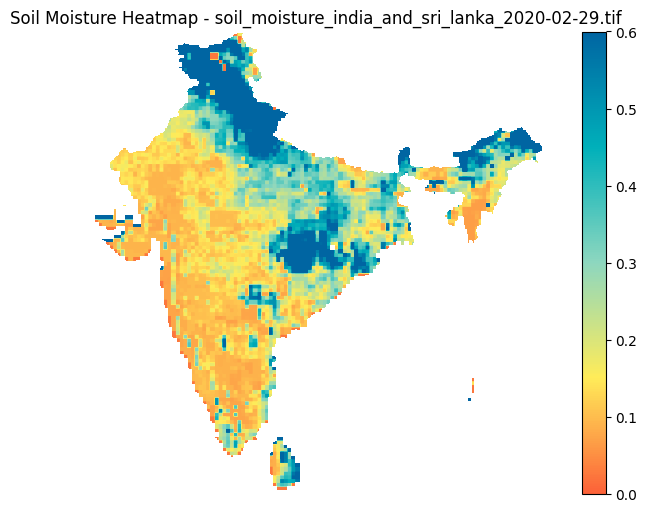

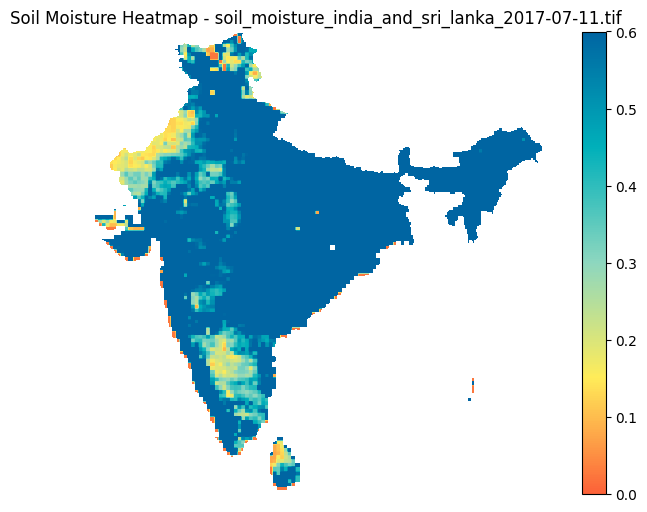

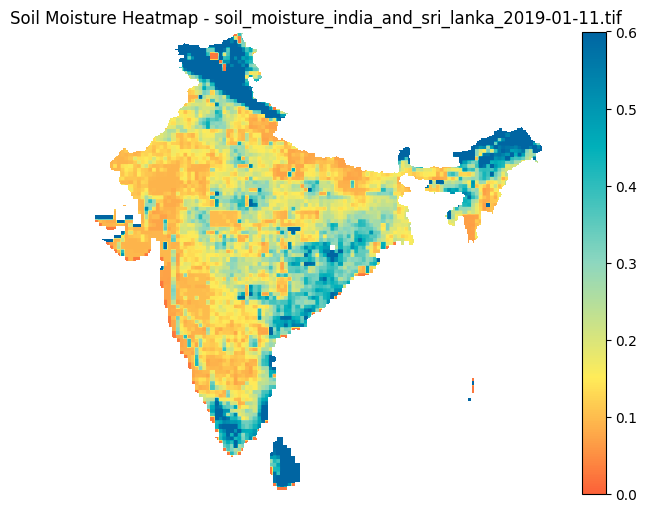

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os

# Define the custom color palette from visualization_params
colors = ['#fc6238', '#ffec59', '#8dd7bf', '#00b0ba', '#0065a2']
custom_cmap = LinearSegmentedColormap.from_list('custom_palette', colors)

# Load the .tif heatmap file
def load_tif_data(tif_file):
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read the first band
    return data

# Specify the directory containing the .tif files
tif_folder_path = '/content/nasa-soil-moisture-india-dataset/NASA_Soil_Moisture_India_Dataset'

# List all .tif files in the specified folder
tif_files = [f for f in os.listdir(tif_folder_path) if f.endswith('.tif')]

# Loop through each .tif file and display the heatmap
for tif_file in tif_files:
    tif_file_path = os.path.join(tif_folder_path, tif_file)

    # Load heatmap data
    heatmap_data = load_tif_data(tif_file_path)

    # Show the heatmap with the custom colormap
    plt.figure(figsize=(10, 6))
    plt.imshow(heatmap_data, cmap=custom_cmap, vmin=0.0, vmax=0.6)  # Set vmin and vmax as in visualization_params
    plt.colorbar()
    plt.title(f"Soil Moisture Heatmap - {tif_file}")
    plt.axis('off')  # Optional: turn off axis labels
    plt.show()